## Exploratory Data Analysis

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys
sys.path.append(os.path.dirname(os.path.abspath('')))
from data.data_loading import load_data

In [3]:
project_root_dir = os.path.dirname(os.getcwd())
data_dirname = os.path.join(project_root_dir, 'challenge_data')
# read data
X, y, _ = load_data(data_dirname)
X.sort_values("DAY_ID")

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
742,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003
1211,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047
1408,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
1468,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
329,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1987,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792
986,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792
1465,472,1213,DE,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,0.868310,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805
873,1688,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,0.868310,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805


In [4]:
# data types
X.dtypes
# all data is numeric except Country tag

ID                    int64
DAY_ID                int64
COUNTRY              object
DE_CONSUMPTION      float64
FR_CONSUMPTION      float64
DE_FR_EXCHANGE      float64
FR_DE_EXCHANGE      float64
DE_NET_EXPORT       float64
FR_NET_EXPORT       float64
DE_NET_IMPORT       float64
FR_NET_IMPORT       float64
DE_GAS              float64
FR_GAS              float64
DE_COAL             float64
FR_COAL             float64
DE_HYDRO            float64
FR_HYDRO            float64
DE_NUCLEAR          float64
FR_NUCLEAR          float64
DE_SOLAR            float64
FR_SOLAR            float64
DE_WINDPOW          float64
FR_WINDPOW          float64
DE_LIGNITE          float64
DE_RESIDUAL_LOAD    float64
FR_RESIDUAL_LOAD    float64
DE_RAIN             float64
FR_RAIN             float64
DE_WIND             float64
FR_WIND             float64
DE_TEMP             float64
FR_TEMP             float64
GAS_RET             float64
COAL_RET            float64
CARBON_RET          float64
dtype: object

In [5]:
# Check missing values
nb_missing = X.isna().sum()
rate_missing = nb_missing / X.ID.nunique()
rate_missing.head()

ID                0.0
DAY_ID            0.0
COUNTRY           0.0
DE_CONSUMPTION    0.0
FR_CONSUMPTION    0.0
dtype: float64

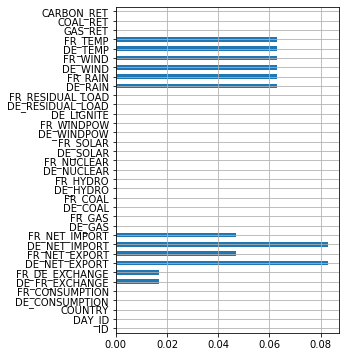

In [6]:
fig, ax = plt.subplots(figsize=(4,6))
ax1 = ax
rate_missing.plot(kind="barh", ax=ax1)
ax1.grid()
# < 9% missing data on some stocks

Text(0.5, 1.0, 'TARGET')

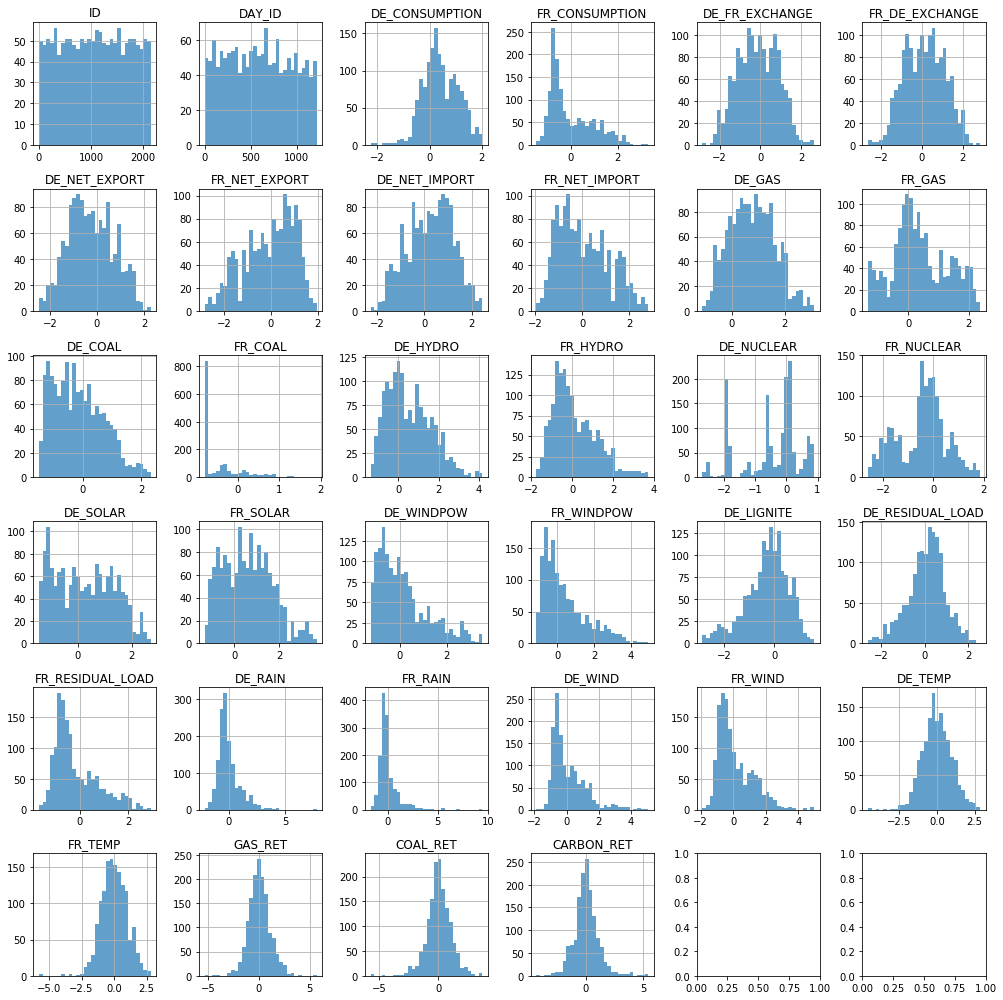

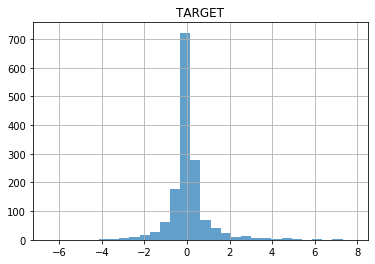

In [7]:
# feature distribution, both countries
features = [feature for feature in X.columns if feature != "COUNTRY"]

nb_col = 6
nb_row = - (-len(features)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,14))

for i, feature in enumerate(features):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.set_title(feature)
    ax1.grid()
    X[feature].hist(bins= 30, ax=ax1, alpha=0.7)

plt.tight_layout()

fig, ax = plt.subplots()
ax1 = ax
y["TARGET"].hist(bins= 30, ax=ax1, alpha=0.7)
ax1.set_title("TARGET")

Nb of data points by country:
FR    851
DE    643
Name: COUNTRY, dtype: int64


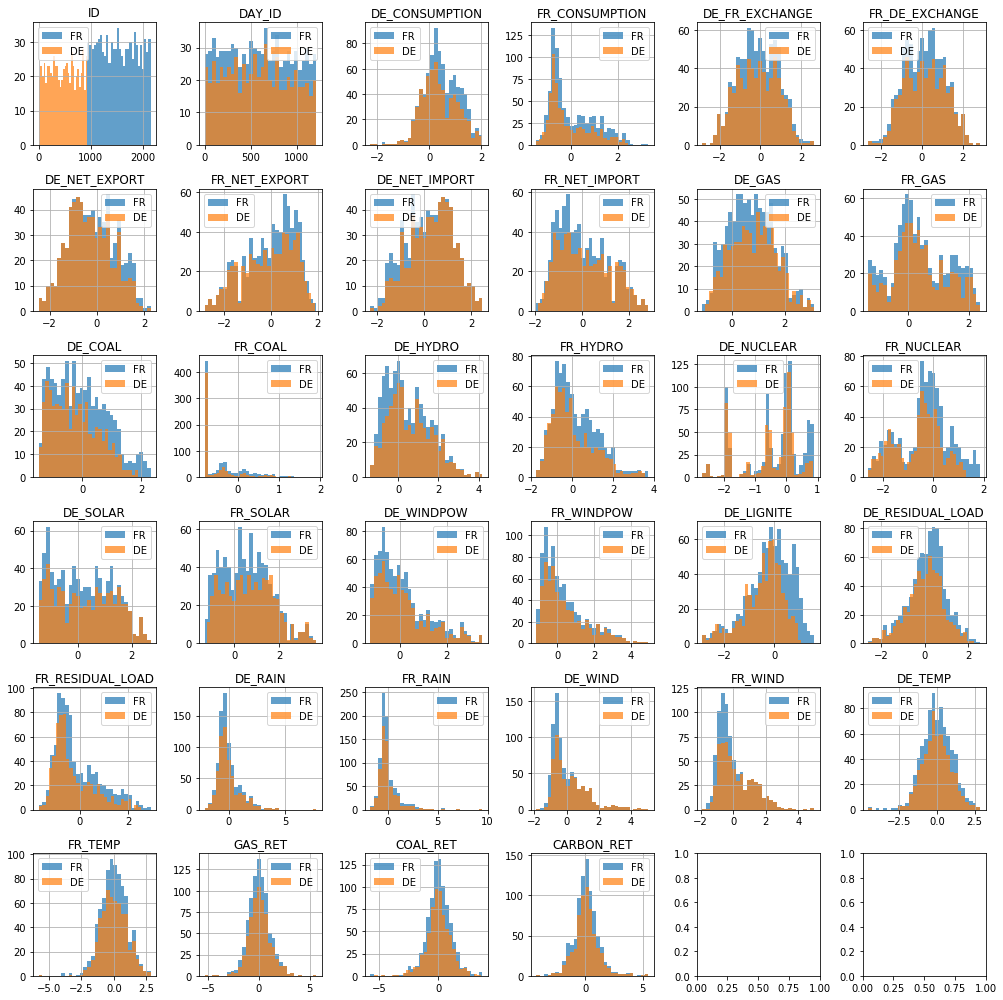

In [8]:
# feature distribution, France & Germany
features = [feature for feature in X.columns if feature != "COUNTRY"]

nb_col = 6
nb_row = - (-len(features)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,14))

print("Nb of data points by country:")
print(X.COUNTRY.value_counts())

for i, feature in enumerate(features):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.set_title(feature)
    ax1.grid()
    X[X.COUNTRY == "FR"][feature].hist(bins= 30, ax=ax1, alpha=0.7, label= "FR")
    X[X.COUNTRY == "DE"][feature].hist(bins= 30, ax=ax1, alpha=0.7, label= "DE")
    ax1.legend()

plt.tight_layout()

Nb of data points by country:
FR    851
DE    643
Name: COUNTRY, dtype: int64


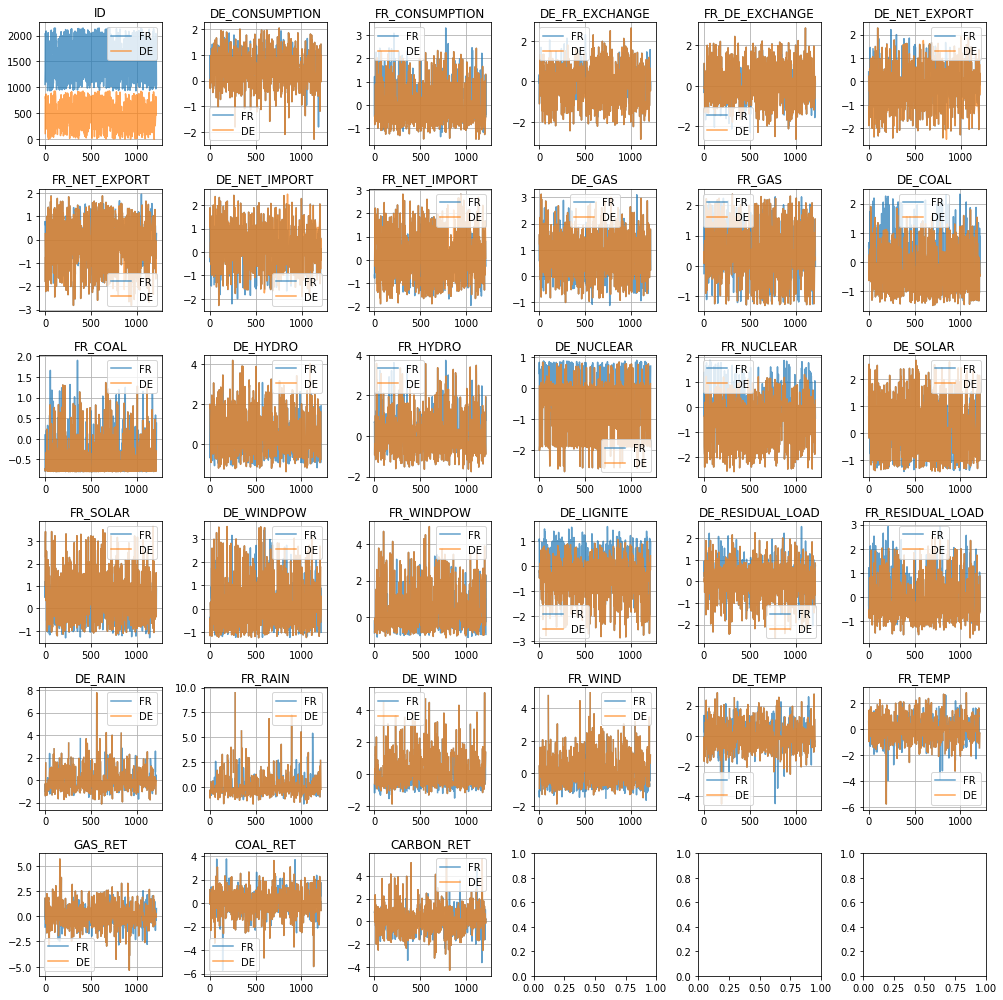

In [9]:
# Check time series
# feature distribution, France & Germany
features = [feature for feature in X.columns if not feature in ["COUNTRY", "DAY_ID"]]

nb_col = 6
nb_row = - (-len(features)//6)
fig, ax = plt.subplots(nb_row, nb_col, figsize=(14,14))

print("Nb of data points by country:")
print(X.COUNTRY.value_counts())

for i, feature in enumerate(features):
    i_col = i % nb_col
    i_row = i // nb_col
    ax1 = ax[i_row, i_col]
    
    ax1.set_title(feature)
    time_series = lambda COUNTRY: X[X.COUNTRY == COUNTRY].set_index("DAY_ID")[feature].sort_index()
    ax1.plot(time_series("FR"), label = "FR", alpha=0.7)
    ax1.plot(time_series("DE"), label = "DE", alpha=0.7)
    ax1.legend()
    ax1.grid()

plt.tight_layout()

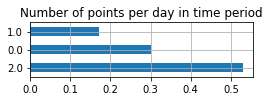

In [10]:
# missing days?
F = X.DAY_ID.value_counts().sort_index()
F = F.reindex(range(F.index.max()))
F = F.fillna(0)
F = F.value_counts()
F /= F.sum()
fig, ax = plt.subplots(figsize=(4,1))
ax1 = ax
ax1.set_title("Number of points per day in time period")
F.plot(kind="barh", ax=ax1)
ax1.grid()